# 「ベイズ推論による機械学習入門」P.68 ウィシャート分布

## ウィシャート分布

* 定義
$$\mathcal{W}(\mathbf{\Lambda} | \mathbf{\nu}, \mathbf{W}) = C_\mathcal{W}(\mathbf{\nu}, \mathbf{W}) |\mathbf{\Lambda}|^{\frac{\nu - D - 1}{2}} \exp\Bigr\{-\frac{1}{2}\mathrm{Tr}(\mathbf{W}^{-1})\mathbf{\Lambda} \Bigr\} $$

$$\mathbf{A}を正定値行列とすると、\mathbf{\Lambda} = \mathbf{A}^{D\times D} \quad \mathbf{\nu} > D-1 \quad \mathbf{W} = \mathbf{A}^{D\times D}$$

* 対数表示
$$\ln \mathcal{W}(\mathbf{\Lambda} | \mathbf{\nu}, \mathbf{W}) = \frac{\nu-D-1}{2}\ln|\mathbf{\Lambda}| - \frac{1}{2}\mathrm{Tr}(\mathbf{W}^{-1}\mathbf{\Lambda}) + \ln C_\mathcal{W}(\mathbf{\nu}, \mathbf{W})) $$

* 対数正則化項
$$\ln C_\mathcal{W}(\mathbf{\nu}, \mathbf{W}) = -\frac{\nu}{2} \ln |\mathbf{W}| - \frac{\nu D}{2} \ln 2 - \frac{D(D-1)}{4} \ln \pi - \sum_{d=1}^D \ln \Gamma (\frac{\nu + 1 - d}{2}) $$

### ウィシャート分布

2次元ウィシャート分布からサンプルされた精度行列を使って2次元ガウス分布を生成する。

In [73]:
using LinearAlgebra
using SpecialFunctions: gamma

const Γ = gamma

D = 2
ν = 5.0
W =  Matrix{Float64}(2.0I, 2, 2)
Λ = ν * W


対数正則化項 = -ν / 2 * logdet(W) - (ν * D) / 2 * log(2) - (D * (D - 1)) / 4 * log(π) 
項4 = 0.0
for d in 1:D
    項4 += log(Γ((ν + 1 - d) / 2))
end
対数正則化項 = 対数正則化項 - 項4


対数正定置行列 = ((ν - D  - 1) / 2 * logdet(Λ)) .- 1 / 2 * tr.(inv(W) * Λ) .+ 対数正則化項
正定置行列 = exp(対数正定置行列)

2×2 Array{Float64,2}:
  0.041113  -0.040972
 -0.040972   0.041113

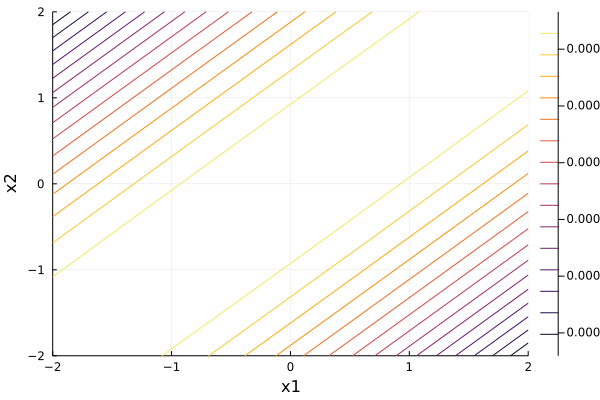

In [74]:
# 多次元ガウス分布
function MultivariateGaussian(x...; μ, Σ)
    D = length(μ)
    Λ = inv(Σ)
    cons = 1 / √((2π)^D * det(Σ))
    cons * exp(-0.5 * (x .- μ)' * Λ * (x .- μ))
end

# x軸を設定
x1 = range(-2, 2, length=50)
x2 = range(-2, 2, length=50)

# パラメータを設定
μ = [
    0.0 
    0.0
]

Σ = inv(正定置行列)

# 多次元ガウス分布の確立密度を計算
z = MultivariateGaussian.(x1', x2; μ=μ, Σ=Σ)

# 作図
using Plots
contour(x1, x2, z)
plot!(xlabel="x1", ylabel="x2")